# LangGrpah 單代理通用

## 套件引入與數值初始化

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath("../src"))
from tw_textforge.agent.ai_model import AIModel
from tw_textforge.agent.general.single_agent_graph import GeneralSingleAgentGraph

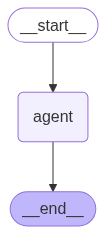

In [2]:
llm = AIModel().llm
generalgraph_obj = GeneralSingleAgentGraph(generator_llm=llm, generator_llm_tools=[])
generalgraph_obj.show_graph()

In [3]:
from langchain_core.messages import convert_to_messages

def pretty_print_message(message, indent=False):
    pretty_message = message.pretty_repr(html=True)
    if not indent:
        print(pretty_message)
        return

    indented = "\n".join("\t" + c for c in pretty_message.split("\n"))
    print(indented)


def pretty_print_messages(update, last_message=False):
    is_subgraph = False
    if isinstance(update, tuple):
        ns, update = update
        # skip parent graph updates in the printouts
        if len(ns) == 0:
            return

        graph_id = ns[-1].split(":")[0]
        print(f"Update from subgraph {graph_id}:")
        print("\n")
        is_subgraph = True

    for node_name, node_update in update.items():
        update_label = f"Update from node {node_name}:"
        if is_subgraph:
            update_label = "\t" + update_label

        print(update_label)
        print("\n")

        messages = convert_to_messages(node_update["messages"])
        if last_message:
            messages = messages[-1:]

        for m in messages:
            pretty_print_message(m, indent=is_subgraph)
        print("\n")

In [4]:
for chunk in generalgraph_obj.graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "在軟體工程中，什麼是資料庫?",
            }
        ]
    },
):
    pretty_print_messages(chunk, last_message=True)

Update from node agent:


================================== Ai Message ==================================
Name: generator_agent

在軟體工程中，資料庫是指以結構化方式儲存和組織數據的工具。通常來說，資料庫是透過稱為資料庫管理系統 (DBMS) 的軟體來管理。

資料庫主要有兩種：關係型資料庫 (SQL) 和非關係型資料庫 (NoSQL)。
關係型資料庫使用表格來儲存資料，其中每一列代表一個記錄，每一列代表一個欄位。關係型資料庫使用 SQL (結構化查詢語言) 來查詢和管理資料。
NoSQL 資料庫，或稱「Not Only SQL」資料庫，提供各種各樣的資料模型。這些資料庫是為了建構現代應用程式而開發的，這些應用程式需要靈活性、擴展性和效能。

資料庫會被軟體工程師用來儲存和擷取各式各樣的資訊，從客戶資料到產品目錄。它們對於大部分的應用程式來說至關重要，因為它們提供了一種持久儲存資料的方式，而且對於這些資料提供結構化方式供工程師管理之用。




In [5]:
chunk

{'agent': {'messages': [AIMessage(content='在軟體工程中，資料庫是指以結構化方式儲存和組織數據的工具。通常來說，資料庫是透過稱為資料庫管理系統 (DBMS) 的軟體來管理。\n\n資料庫主要有兩種：關係型資料庫 (SQL) 和非關係型資料庫 (NoSQL)。\n關係型資料庫使用表格來儲存資料，其中每一列代表一個記錄，每一列代表一個欄位。關係型資料庫使用 SQL (結構化查詢語言) 來查詢和管理資料。\nNoSQL 資料庫，或稱「Not Only SQL」資料庫，提供各種各樣的資料模型。這些資料庫是為了建構現代應用程式而開發的，這些應用程式需要靈活性、擴展性和效能。\n\n資料庫會被軟體工程師用來儲存和擷取各式各樣的資訊，從客戶資料到產品目錄。它們對於大部分的應用程式來說至關重要，因為它們提供了一種持久儲存資料的方式，而且對於這些資料提供結構化方式供工程師管理之用。', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, name='generator_agent', id='run--3e632556-7228-4264-86ff-3d9c00b06c31-0', usage_metadata={'input_tokens': 44, 'output_tokens': 222, 'total_tokens': 266, 'input_token_details': {'cache_read': 0}})]}}